In [74]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Vcx\Desktop\For GitHub\Club Loan Data\LoanData_Cleaned.csv')

# Basic overview
print(df.shape)

print(df.dtypes)

print(df.isnull().sum())

df.head()

(2260668, 13)
loan_amnt                 int64
term                    float64
int_rate                float64
grade                    object
sub_grade                object
emp_length              float64
home_ownership           object
annual_inc              float64
purpose                  object
issue_d                  object
loan_status              object
is_default                int64
income_to_loan_ratio    float64
dtype: object
loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
purpose                 0
issue_d                 0
loan_status             0
is_default              0
income_to_loan_ratio    0
dtype: int64


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,issue_d,loan_status,is_default,income_to_loan_ratio
0,2500,36.0,13.56,C,C1,-1.0,RENT,55000.0,debt_consolidation,Dec-2018,Current,0,22.000000
1,30000,60.0,18.94,D,D2,-1.0,MORTGAGE,90000.0,debt_consolidation,Dec-2018,Current,0,3.000000
2,5000,36.0,17.97,D,D1,6.0,MORTGAGE,59280.0,debt_consolidation,Dec-2018,Current,0,11.856000
3,4000,36.0,18.94,D,D2,-1.0,MORTGAGE,92000.0,debt_consolidation,Dec-2018,Current,0,23.000000
4,30000,60.0,16.14,C,C4,-1.0,MORTGAGE,57250.0,debt_consolidation,Dec-2018,Current,0,1.908333


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             int64  
 1   term                  float64
 2   int_rate              float64
 3   grade                 object 
 4   sub_grade             object 
 5   emp_length            float64
 6   home_ownership        object 
 7   annual_inc            float64
 8   purpose               object 
 9   issue_d               object 
 10  loan_status           object 
 11  is_default            int64  
 12  income_to_loan_ratio  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 224.2+ MB


In [76]:
df.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,is_default,income_to_loan_ratio
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,4.291032e+01,1.309291e+01,1.757235e+00,7.799241e+04,1.254421e-01,7.197087e+00
std,9.190245e+03,1.086716e+01,4.832114e+00,3.184284e+00,1.126961e+05,3.312196e-01,1.326536e+01
min,5.000000e+02,3.600000e+01,5.310000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,3.600000e+01,9.490000e+00,-1.000000e+00,4.600000e+04,0.000000e+00,3.343841e+00
50%,1.290000e+04,3.600000e+01,1.262000e+01,1.000000e+00,6.500000e+04,0.000000e+00,5.000000e+00
75%,2.000000e+04,6.000000e+01,1.599000e+01,4.000000e+00,9.300000e+04,0.000000e+00,8.000000e+00
max,4.000000e+04,6.000000e+01,3.099000e+01,9.000000e+00,1.100000e+08,1.000000e+00,6.200000e+03


In [77]:
df["is_default"].value_counts(normalize=True)

is_default
0    0.874558
1    0.125442
Name: proportion, dtype: float64

# Feature Engineering

In [78]:
# Convert issue date from string to datetime format and extract the year of loan issuance.
# This allows us to include temporal trends (e.g., default patterns over time) in the model.
df['issue_d_parsed'] = pd.to_datetime(df['issue_d'], format='%b-%Y', errors='coerce')
df = df[df['issue_d_parsed'].notna()]  # Remove rows with invalid date parsing
df['issue_year'] = df['issue_d_parsed'].dt.year

In [79]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,issue_d,loan_status,is_default,income_to_loan_ratio,issue_d_parsed,issue_year
0,2500,36.0,13.56,C,C1,-1.0,RENT,55000.0,debt_consolidation,Dec-2018,Current,0,22.000000,2018-12-01,2018
1,30000,60.0,18.94,D,D2,-1.0,MORTGAGE,90000.0,debt_consolidation,Dec-2018,Current,0,3.000000,2018-12-01,2018
2,5000,36.0,17.97,D,D1,6.0,MORTGAGE,59280.0,debt_consolidation,Dec-2018,Current,0,11.856000,2018-12-01,2018
3,4000,36.0,18.94,D,D2,-1.0,MORTGAGE,92000.0,debt_consolidation,Dec-2018,Current,0,23.000000,2018-12-01,2018
4,30000,60.0,16.14,C,C4,-1.0,MORTGAGE,57250.0,debt_consolidation,Dec-2018,Current,0,1.908333,2018-12-01,2018


In [80]:
# Apply log transformation to annual income to reduce skew caused by extremely high values
df['log_annual_inc'] = np.log1p(df['annual_inc'])

In [81]:
# Cap income-to-loan ratio at 100 to reduce the influence of outliers (very rare values > 100)
df['itl_ratio_capped'] = df['income_to_loan_ratio'].clip(upper=100)

In [82]:
# Convert categorical variables into dummy/indicator variables for use in logistic regression
categorical = ['grade', 'sub_grade', 'home_ownership', 'purpose']
df_encoded = pd.get_dummies(df[categorical], drop_first=True)

# Combine numerical features and encoded categorical features into a single feature set
features = pd.concat([
    df[['loan_amnt', 'term', 'int_rate', 'log_annual_inc', 'emp_length', 'itl_ratio_capped', 'issue_year']],
    df_encoded
], axis=1)

# Define the target variable (1 = default, 0 = paid)
target = df['is_default']

# Logistic regression Model

In [83]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42, stratify=target)

In [85]:
# Standardize the numerical features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [87]:
# Predict classes and probabilities
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Print classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    593126
           1       0.30      0.01      0.02     85075

    accuracy                           0.87    678201
   macro avg       0.59      0.50      0.48    678201
weighted avg       0.80      0.87      0.82    678201

Confusion Matrix:
 [[590892   2234]
 [ 84135    940]]
ROC AUC Score: 0.7277967039126223


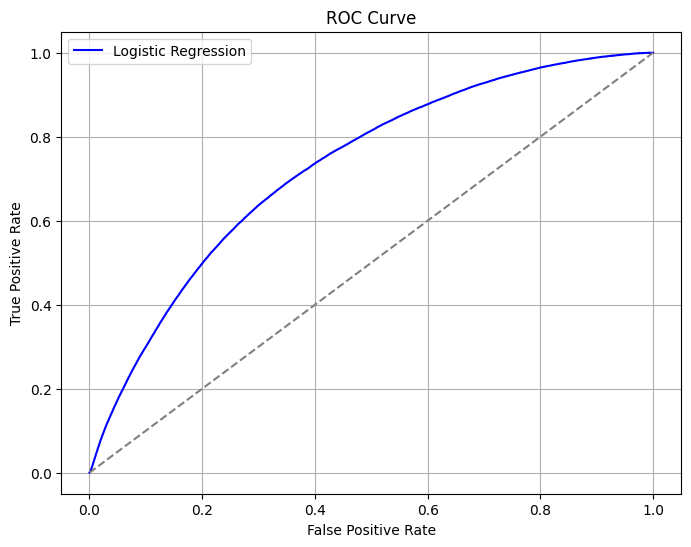

In [88]:
# Visualize model performance with ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# Re-train Logistic Regression with balanced class weights to handle class imbalance
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train_scaled, y_train)

# Predictions
y_pred_bal = model_balanced.predict(X_test_scaled)
y_proba_bal = model_balanced.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report (balanced):\n", classification_report(y_test, y_pred_bal))
print("Confusion Matrix (balanced):\n", confusion_matrix(y_test, y_pred_bal))
print("ROC AUC Score (balanced):", roc_auc_score(y_test, y_proba_bal))

Classification Report (balanced):
               precision    recall  f1-score   support

           0       0.94      0.67      0.78    593126
           1       0.23      0.68      0.34     85075

    accuracy                           0.67    678201
   macro avg       0.58      0.67      0.56    678201
weighted avg       0.85      0.67      0.73    678201

Confusion Matrix (balanced):
 [[396855 196271]
 [ 27192  57883]]
ROC AUC Score (balanced): 0.7314030285410444


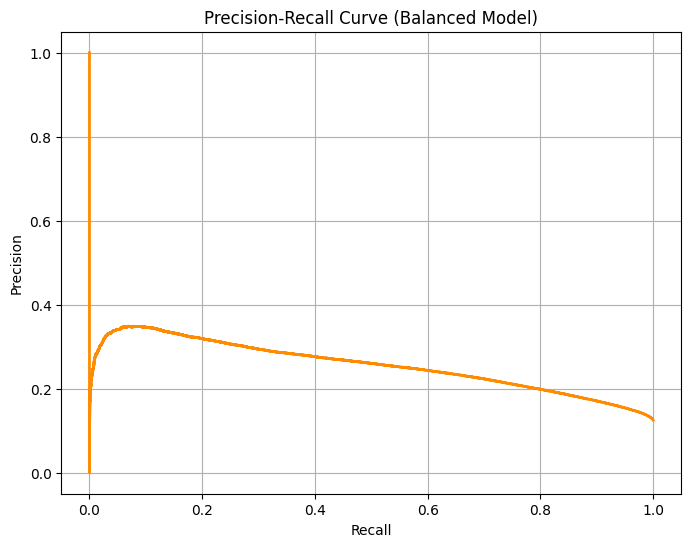

In [90]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_bal)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.title('Precision-Recall Curve (Balanced Model)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [94]:
# Add predicted probabilities to the original DataFrame (only for X_test index)
df_export = df.iloc[X_test.index].copy()
df_export['predicted_default_proba'] = y_proba_bal

# Export for Power BI
df_export.to_csv("C:/Users/Vcx/Desktop/For GitHub/Club Loan Data/LoanData_Predicted.csv", index=False)